<a href="https://colab.research.google.com/github/Sagnikabhol/simple_project/blob/main/simpleproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(42)
size = np.random.randint(500, 5000,1000)
bedroom = np.random.randint(1,6,1000)
location = np.random.randint(1,11,1000)
age = np.random.randint(1,51,1000)
price = (size * 300) + (bedroom * 50000) + (location * 20000) + (age * -1000) + np.random.randint(-10000, 10000, 1000)
df = pd.DataFrame({'size': size, 'bedroom': bedroom, 'location': location, 'age': age, 'price': price})
print(df.head())
csv_filename = "house_price_data.csv"
df.to_csv(csv_filename, index=False)
print(f"dataset saved as '{csv_filename}'with{df.shape[0]} rows and {df.shape[1]}columns.")

   size  bedroom  location  age    price
0  1360        2         4   23   567625
1  4272        3         2   15  1448229
2  3592        1         6   27  1228510
3   966        1         2   11   360161
4  4926        2         7   50  1662170
dataset saved as 'house_price_data.csv'with1000 rows and 5columns.


In [ ]:
import pandas as pd
df = pd.read_csv('house_price_data.csv')
print(df.head())


   size  bedroom  location  age    price
0  1360        2         4   23   567625
1  4272        3         2   15  1448229
2  3592        1         6   27  1228510
3   966        1         2   11   360161
4  4926        2         7   50  1662170


In [ ]:
print("\nMissing values:\n",df.isnull().sum())
print("\nDataset summary:\n",df.describe())


Missing values:
 size        0
bedroom     0
location    0
age         0
price       0
dtype: int64

Dataset summary:
               size      bedroom     location          age         price
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean   2815.422000     2.990000     5.440000    25.505000  1.077488e+06
std    1255.514921     1.427564     2.811459    14.401159  3.814041e+05
min     503.000000     1.000000     1.000000     1.000000  2.014590e+05
25%    1749.500000     2.000000     3.000000    13.000000  7.585310e+05
50%    2862.500000     3.000000     5.000000    26.000000  1.088904e+06
75%    3849.500000     4.000000     8.000000    38.000000  1.380862e+06
max    4999.000000     5.000000    10.000000    50.000000  1.867149e+06


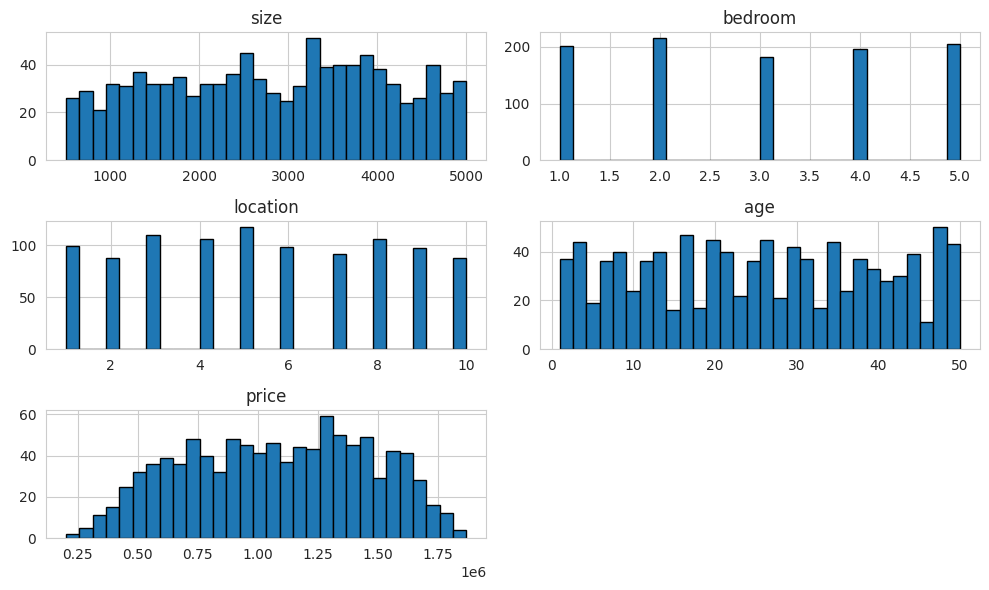

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
df.hist(figsize=(10,6), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

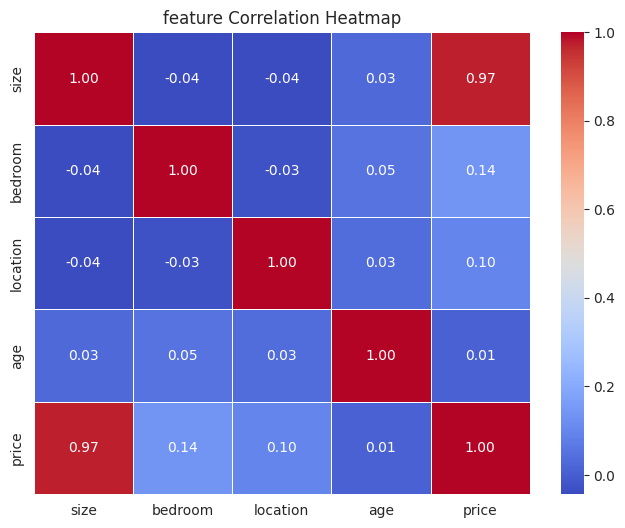

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f",linewidths=0.5)
plt.title("feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
X = df[["size","bedroom","location","age"]]
y = df["price"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel performance:\nMAE:{mae:2f},R²:{r2:.2f}")


Model performance:
MAE:5127.589454,R²:1.00


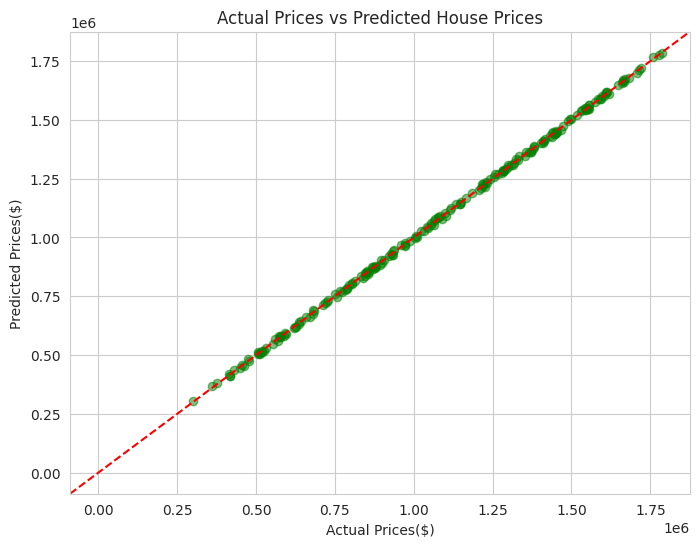

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="green")
plt.xlabel("Actual Prices($)")
plt.ylabel("Predicted Prices($)")
plt.title("Actual Prices vs Predicted House Prices")
plt.axline([0,0],slope=1, color="red",linestyle="--")
plt.show()